<a href="https://colab.research.google.com/github/melder2/MLA_MRE/blob/main/MLA3_MRE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Michael Elder**  

## Standard Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook. 

In [4]:
#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

## Imports for Splitting Data and Building Pipeline


In [5]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [7]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [8]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

**The function below plots a straight line on a plot**

In [9]:
def abline(slope, intercept,color):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c=color)

**The function below will be used to draw the margins similar to the plots in the book**

In [10]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
  
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

## Problem 1

### Reading the Data

In [36]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

In [12]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
forgery       int64
dtype: object

In [13]:
df.tail()

,variance,skewness,curtosis,entropy,forgery
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


### Statistical and Visual Exploration

The numerical columns are variance, skewness, curtosis, and entropy

forgery
0    762
1    610
Name: forgery, dtype: int64


<Axes: ylabel='forgery'>

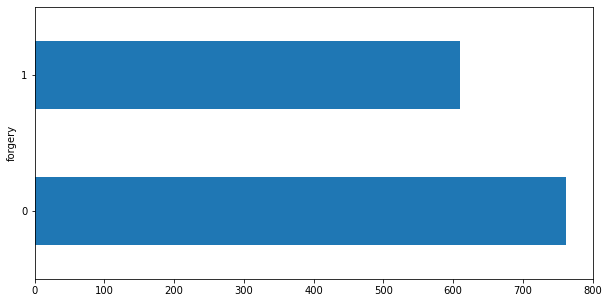

In [14]:
fList = pd.Series(df.forgery.groupby(df.forgery).count())
print(fList)
fList.plot(kind='barh', figsize=(10,5))

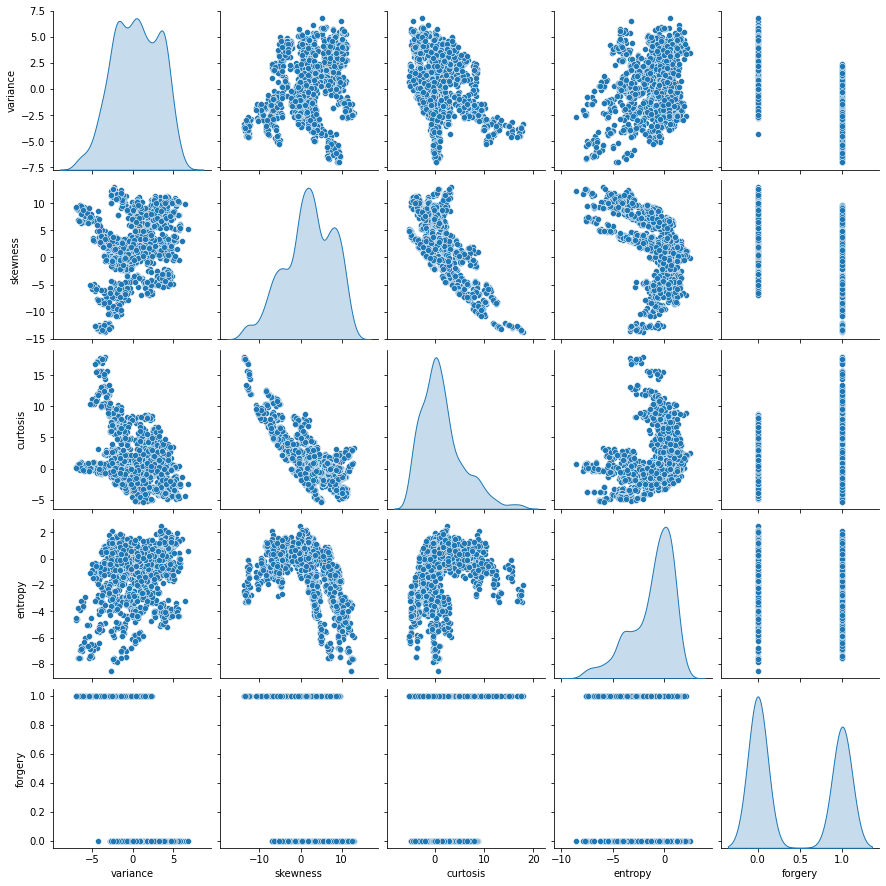

In [15]:
sns.pairplot(data=df, diag_kind='kde')

**Skewness and curtosis looks like they have a linear relationship. Forgery graphs aren't helpful because its either a 0 or a 1 and it doesn't give you any insights on the data**

### Splitting Data into Train/Test

In [37]:
X = df[['variance', 'skewness','curtosis','entropy']]
y = df[['forgery']]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

### Building the Pipeline

In [39]:
num_attribs = ['variance', 'skewness', 'curtosis','entropy']


In [40]:
col_transform = ColumnTransformer(transformers=[
    
    ('num', MinMaxScaler(), num_attribs)],
    remainder='passthrough'
)

In [41]:
pipeline = Pipeline([
    ('transform', col_transform),
    ('SVCLinear', SVC(kernel="linear", C=1, max_iter=100000))
    
])

In [42]:
pipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('SVCLinear', SVC(C=1, kernel='linear', max_iter=100000))])

### Executing the Model

In [48]:
pipeline.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('SVCLinear', SVC(C=1, kernel='linear', max_iter=100000))])

### Evaluating Model

In [49]:
y_pred = pipeline.predict(X_test)

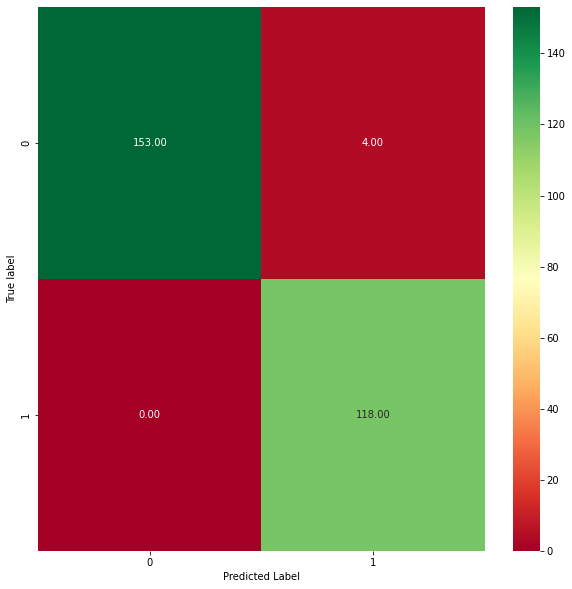

In [50]:
plot_cm(y_test, y_pred)

In [51]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9672131147540983
1.0
0.9833333333333333


### Conclusion
The ML Algorithm predicted:
  False negatives: 0
  False positives: 4
  True negatives: 153 
  True positives: 118
The machine algorithm is very accurate with precision at 96.7%, recall at 100%, and f1 score at 98.3%

## Problem 2

### Reading the Data

In [11]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')

In [12]:
df.rename(columns={'Usage_kWh':'usage_kwh'}, inplace=True)
df.rename(columns={'Lagging_Current_Reactive.Power_kVarh':'lag_react_pwr_kvarh'}, inplace=True)
df.rename(columns={'Leading_Current_Reactive_Power_kVarh':'lead_react_pwr_kvarh'}, inplace=True)
df.rename(columns={'Lagging_Current_Power_Factor':'lag_current_pwr'}, inplace=True)
df.rename(columns={'Leading_Current_Power_Factor':'lead_current_pwr'}, inplace=True)
df.rename(columns={'NSM':'nsm'}, inplace=True)
df.rename(columns={'WeekStatus':'week_status'}, inplace=True)
df.rename(columns={'Day_of_week':'day_of_week'}, inplace=True)
df.rename(columns={'Load_Type':'load_type'}, inplace=True)

In [13]:
df.dtypes

date                     object
usage_kwh               float64
lag_react_pwr_kvarh     float64
lead_react_pwr_kvarh    float64
CO2(tCO2)               float64
lag_current_pwr         float64
lead_current_pwr        float64
nsm                       int64
week_status              object
day_of_week              object
load_type                object
dtype: object

### Splitting Data into Train/Test

In [14]:
X = df[['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh',
       'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm',
       'week_status', 'day_of_week', 'load_type']]
y = df[['usage_kwh']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

### Building the Pipeline

In [16]:
cat_attribs = ['week_status','day_of_week','load_type']
num_attribs = ['lag_react_pwr_kvarh','lead_react_pwr_kvarh','CO2(tCO2)','lag_current_pwr','lead_current_pwr','nsm']


In [21]:
col_transform = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), cat_attribs),
    ('num', MinMaxScaler(), num_attribs)],
    remainder='passthrough'
)

In [18]:
pipeline = Pipeline([
    ('transform', col_transform),
    ('svr_model', SVR(kernel="linear", C=75, max_iter=100000, epsilon=0.0))
])

### Executing the Model

In [19]:
pipeline.fit(X_train, y_train.values.ravel())

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('svr_model',
                 SVR(C=75, epsilon=0.0, kernel='linear', max_iter=100000))])

### Evaluating Model

In [22]:
y_pred = pipeline.predict(X_test)

In [30]:
print(mean_squared_error(y_test, y_pred)**0.5)



5.12592539955389


Mean squared error of 5 for the model means that the model is a good fit

### Conclusion
This model is very good for predicting kwh usage